In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="custom.css">

# Deep Learning for brain MRI segmentation
### Big Data, AI, and HPC meet together


**PyConX Italian Conference**, Florence, Sun 05.05.2019

*Giuseppe Di Bernardo*[<sup>1</sup>](#fn1)   

<span id="fn1">Data Analytics researcher @MPCDF</span>  
<img src="./img/brain.jpg" width="35%" align="center">
<!--
Slides: <a href="http://fabienmaussion.info/acinn_xarray_workshop">http://fabienmaussion.info/acinn_xarray_workshop</a>
-->
<!--
Notebook: <a href="https://github.com/fmaussion/teaching/blob/master/xarray_intro_acinn/ACINN_workshop_xarray-slides.ipynb"> On GitHub</a> 
-->

## Agenda
- An Overview of AI in the HPC Landscape
    - Learning Problems on Parallel Computer Architecture
    - The Python AI Software Ecosystem at the MPCDF: some best practices
- The Study Case: Segmenting Brain MRI Images    
<!--- Brain MRI Segmentation: A Gentle Introduction-->
    - Inferencing
        - The Challenge
        - Our Tile-based Strategy
    - Tile-based Inference goes Parallel on MPCDF's Clusters 
        - 3D Reconstruction 
        - Evaluation
- Ongoing and Future Work
    - AI-HPC is Happening Now

<img src="./img/checklist.png" width="10%" align="right">

We are living in the age of Big Data. Every day 2.5m Terabytes of data are generated [1] and this process is accelerating: According to recent estimates, 90% of all data on the internet has been generated in the last two years [1]. One answer to the problem of getting insights from this flood of data is the breathtaking development that machine learning, and in particular deep learning, has undergone in the last decade. Big efforts are being made to improve the efficiency of machine learning models. However, the increasing amount of training data, as well as the growing demands on the accuracy of these models have led to rapidly growing computational complexity.

## An Overview of AI in the HPC Landscape
- *Scalability is a requirement as training is a "big data" problem*  
(from: **How Neural Nets Work**, *A. Lapedes & R. Farber, 1988*: <a href="https://papers.nips.cc/paper/59-how-neural-nets-work.pdf">https://papers.nips.cc/paper/59-how-neural-nets-work.pdf</a>)

<img src="./img/abstract_how_NN.png" width="75%" align="center">

### Learning problems on parallel computer architecture
- *Machine learning tasks are often compute intensive, making them similar to traditional high-performance computing (HPC) applications*

<img src="./img/parallel_arch.png" width="90%" align="center">

(Review article: **Demystifying Parallel and Distributed Deep Learning: An In-Depth Concurrency Analysis**, *T. Ben-Nun & T. Hoefler, 2018*: <a href="https://arxiv.org/pdf/1802.09941.pdf">https://arxiv.org/pdf/1802.09941.pdf</a>)

### Learning problems on parallel computer architecture

- *DL training is a classic high-performance computing problem which demands:*
    - Large compute capacity in terms of `FLOPs`, memory capacity and bandwidth;
    - A performant interconnect for fast communication of gradients and model parameters
    - Parallel `I/O` and storage with sufficient bandwidth to keep the compute fed at scale
<img src="./img/miniSGD.png" width="100%" align="center">
<!--<img src="./img/scaling_dl.png" width="20%" align="bottom"-->

## Why Python?
<img src="./img/hacker_rank.png" width="80%" align="center">

(**_Python_**, Java, R are top 3 languages in job postings for data science and machine learning jobs : <a href="https://www.kdnuggets.com/2017/01/most-popular-language-machine-learning-data-science.html">https://www.kdnuggets.com/2017/01/most-popular-language-machine-learning-data-science.html</a>) 

* Idea: Make Python usable beyond prototyping environment by scaling out to HPC and Big Data environments

## The Python AI Software Ecosystem at the MPCDF
<img src="./img/ml_python.png" width="30%" align="right">
- Due to our hierarchical module system, the ML/DL related modules will only be available after the Python module has been loaded:

```bash
gdib@cobra01:~> module load anaconda/3/5.1
gdib@cobra01:~> python
Python 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19)
[GCC 7.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>>
```

### Did you know that ...
- Faster Python application performance (e.g. Numpy, Scikit-Learn) with Intel® MKL and Intel® DAAL;
- Always check, whether `numpy` is paired with Intel® MKL library using:

```bash
gdib@cobra01:~> python
Python 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19)
[GCC 7.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import numpy as np
>>> np.show_config()
mkl_info:
    libraries = ['mkl_rt', 'pthread']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
```
<img src="./img/intel-python.jpg" width="20%" align="right">

(see *F.Schlimbach's PyConX Keynote*: **[High Performance and scalability made easy for data anlytics/Machine Learning](https://www.pycon.it/conference/talks/high-performance-and-scalability-made-easy-data-analyticsmachine-learning-codes)**

### ... If it is not

- you will see rows like

```bash
blas_mkl_info:
NOT AVAILABLE
 
lapack_mkl_info:
NOT AVAILABLE
```

## TensorFlow (and its brothers)

<img src="./img/TF_logo.png" width="20%" align="right"> 

**Documentation**: https://www.tensorflow.org/

**How to run TensorFlow on the MPCDF's HPC systems**: [LIBRARIES FOR DEEP LEARNING](https://www.mpcdf.mpg.de/services/computing/software/data-analytics/machine-learning-software)

**Current version**: v 1.12.0

**Software for Data Analytics**: [LIST OF SUPPORTED SOFTWARE](https://www.mpcdf.mpg.de/services/computing/software/data-analytics/list-of-supported-software) 

<!--
**53 contributors** (latest release: 24)

**Umbrellas:** [Python for data](http://pydata.org/) & [NumFOCUS](http://www.numfocus.org/) *(but no funding...)*

<img src="./figures/logopydata.png" width="17%" align="left"> 

<img src="./figures/numfocus.png" width="23%" align="right">
-->

### High Level APIs - Keras

<img src="./img/keras-logo-2018-large-1200.png" width="20%" align="right">

**Documentation**: https://www.tensorflow.org/guide/keras

**Current version**: v 2.2.4

On the MPCDF's HPC systems you can either load the Keras (with TensorFlow on backend) module as: 

```
gdib@cobra01:~> module load keras/2.2.4
```

### or
**`import tf.keras`**:


```bash
gdib@cobra01:/ptmp/gdib/projects/deep-learning/tiling_leipzig_skylake> python
Python 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19)
[GCC 7.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import tensorflow as tf
>>> from tensorflow.keras import layers
>>> print(tf.VERSION)
1.12.0
>>> print(tf.keras.__version__)
2.1.6-tf
>>>
```

`tf.keras` is TensorFlow's implementation of the Keras API specification. This is a high-level API to build and train models that includes first-class support for TensorFlow-specific functionality.

## CPU Optimization: TensorFlow with Intel® MKL-DNN

On the MPCDF HPC systems we provide the following libraries which can be used to improve the performance of deep  learning applications:

- CPU based
    - MKL-DNN (current version 0.14) (Source: https://github.com/intel/mkl-dnn)
    - MLSL (current version 2018.02) (Source: https://github.com/intel/MLSL)

### Sanity Check

- Check yourself if you are running the `Intel-optimized TensorFlow` distribution: running the below command must print `"True"` if Intel® MKL-DNN optimizations are present.

```bash
gdib@cobra01:~> python -c "import tensorflow; print(tensorflow.pywrap_tensorflow.IsMklEnabled())"
/mpcdf/soft/SLE_12_SP3/packages/x86_64/anaconda/3.5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
True
```

## GPU Optimization: TensorFlow with NVIDIA cuDNN

On the MPCDF HPC systems we provide the following libraries which can be used to improve the performance of deep  learning applications:

- GPU based

    - cuDNN (current version 7.4) (Source: https://developer.nvidia.com/cudnn)
    - NCCL (current version 2.3.7) (Source: https://developer.nvidia.com/nccl)
<img src="./img/NCCL.png" width="80%" align="center">

### Sanity Check

- How can I ensure that my TensorFlow is running by GPU

```python
>>>from tensorflow.python.client import device_lib
>>>print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17639903784650116782
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 31854421607
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14866225148744489790
physical_device_desc: "device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:16:00.0, compute capability: 7.0"
]
```

## The Study Case: Segmenting Brain MRI Images

*Our present knowledge of cortical structure is based on the analysis of physical 2D sections.[...] Now with the combination of novel 3D imaging techniques and advanced images analysis methods, such as **deep neural networks**, the study of the full three-dimensional structure of the brain is within reach (K. Thierbach (HBCS) et al. 2019, publication in progress)* 
<img src="./img/semantic.png" width="80%" align="middle">

(figure from Z. Akkus et al. 2017: [Deep Learning for Brain MRI Segmentation: State of the Artand Future Directions](https://web.stanford.edu/group/rubinlab/pubs/Akkus-2017.pdf))

### ... in collaboration with MPI for HBCS and Intel®
- Challenges
    - Manual analysis of 3D data is not feasible
    - Image artefacts difficult to handle for classical image processing algorithms


- Goals
    - Detection and segmentation of thousands of cells
    - Minimal labeling/annotation effort
    - Easily adaptable method for varying protocols
    

- Solutions
    - Parallel tile-based inference (this talk)
    - Intel® Distribution of OpenVINO™ toolkit
    
<img src="./img/intelAI.jpg" width="20%" align="left">
<img src="./img/mpi-brain-cognitive.png" width="50%" align="right">

## Inferencing

<img src="./img/scan_fun.png" width="50%" align="middle">

(from **Medium** (Stanford Healthcare for AI): [Don’t Just Scan This: Deep Learning Techniques for MRI](https://medium.com/stanford-ai-for-healthcare/dont-just-scan-this-deep-learning-techniques-for-mri-52610e9b7a85))

In [2]:
import cv2
import sys
import math
import tifffile
import numpy as np
%matplotlib inline
# from skimage import io
import matplotlib.cm as cm
from skimage.filters import rank
from math import sqrt, ceil, floor
from skimage.morphology import disk
from matplotlib import rc, rcParams
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import threshold_minimum
from skimage.external.tifffile import TiffFile
from skimage.util.shape import view_as_windows
import warnings; warnings.simplefilter('ignore')
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans Serif']})
rc('xtick', labelsize = 18)
rc('ytick', labelsize = 18)
rcParams['legend.numpoints'] = 1
rc('text', usetex=True)

### Exploring MRI Volume Slices in Python

<img src="./img/brain_voxel.png" width="50%" align="left">
<img src="./img/voxels.png" width="50%" align="right">

(Review article: **[MRI Segmentation of the Human Brain: Challenges, Methods, and Applications](https://www.hindawi.com/journals/cmmm/2015/450341/)**, I. Despotovic et al. 2015)

In [3]:
"""
Handle 16bit TIFF Images in Python. There seem to be quite a lot of problems with 16-bit grey scale TIFF images (especially with the Python Imaging Library - PIL).
"""
from skimage import io # scikit-image for image processing
PATH="."
IMAGE = PATH+ "/inputs/image_half.tif"
# The image is stored as a NumPy array. Each entry in the array is a pixel value.
volume = io.imread(IMAGE) 
# Show that brain_im is a NumPy array
print('dataset is a {}'.format(type(volume)))
# Show that the data type is unsigned int
print('... of type {}'.format(volume.dtype))
# Show that the data type is unsigned int
print('... and with shape {}'.format(volume.shape))

dataset is a <class 'numpy.ndarray'>
... of type uint16
... and with shape (2304, 1280, 1024, 1)


### Exploring MRI Volume Slices in Python

<img src="./img/image_screen.png" width="80%" align="middle">

In [4]:
# Plot the MRI Slices
def plot_slices(slice):
    fig = plt.figure(figsize=(8.1,5.0))
    ax = fig.add_subplot(1,1,1)

    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)

    ax.minorticks_on()
    ax.tick_params('both', length=15, width=1.4, which='major')
    ax.tick_params('both', length=10, width=1.2, which='minor')
    cs = io.imshow(slice, cmap=cm.coolwarm)
    cbar = fig.colorbar(cs)
    plt.xlabel("Width (pixels)", fontsize=18)
    plt.ylabel("Height (pixels)", fontsize=18)
    plt.title(r'Brain slice at Z = 0 ',fontsize=18)
    plt.show()

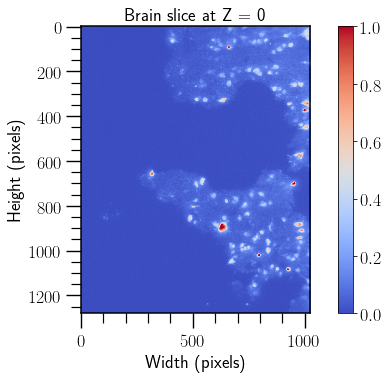

In [5]:
vol = volume.astype('float32') / (2**16 - 1) # Rescale the image, i.e. normalize it
vol_ZYX = np.squeeze(vol) # Drop off the color (grayscale) channel
slice_ZY = vol_ZYX[:, :, 0] # "slicing" the hyper-rectangle, along the three planes
slice_YX = vol_ZYX[0, :, :]
slice_ZX = vol_ZYX[:, 0, :]
plot_slices(slice_YX) # Plot the MRI Slices

### Mixed-Scale Dense Convolutional Neural Network

*“In many scientific applications, tremendous manual labor is required to annotate and tag images — it can take weeks to produce a handful of carefully delineated images[...]. “Our goal was to develop a technique that learns from a very small data set.”*
<img src="./img/3-levels-of-neural-networks.png" width="50%" align="middle">

(Reference:  *D.M.Pelt & J.A.Sethian, 2017*, [**A mixed-scale dense convolutional neural networkfor image analysis**](https://www.pnas.org/content/pnas/early/2017/12/21/1715832114.full.pdf))

```python
def MSD_3D(width,depth,input_shape=(None, None, None, 1),activation='sigmoid',kernel_size=(3, 3, 3),     max_dilations=10, n_output_channels=1, drop_out=0.0,dropout_at_prediction=False, batch_norm=False):
    """MSD 3d Network implementation"""
    inp = Input(shape=input_shape)
    inputs = [inp]

    for i in range(depth):
        for j in range(width):
            s_ij = ((i * width + j) % max_dilations) + 1
            c = _convolution_3D(n_filters=1, dilation=s_ij, inputs=inputs,
                    kernel_size=kernel_size, drop_out=drop_out,
                    dropout_at_prediction=dropout_at_prediction,
                    batch_norm=batch_norm,
                    name='layer_{}_stride_{}'.format(i, s_ij))
            inputs.append(c)

    c = Concatenate()(inputs)
    out = Conv3D(filters=n_output_channels, kernel_size=(1, 1, 1),
            padding='same', activation=activation)(c)
    outputs = [out]
    model = Model(inputs=inp, outputs=out)
    return model

model = MSD_3D(width=5,depth=8,n_output_channels=1,kernel_size=(5, 5, 5),drop_out=0.5,batch_norm=False)
```

### Computational Challenges
- MS-DNet Training:
    * Implemented with TensorFlow on small patches of $96^{3}$
    * Model Size: 100K parameters
- MS-DNet Inferencing:
    * Computational requirement: 16 Pflop
    * Memory requirement: 24 TB (with `TensorFlow`)
    * Does not fit typical 3D convolution primitive
    * Topology structure does not allow memory reuse
        * High data dependencies across topology
        * Convolutions reuse all previous feature maps
    
(Aknowledgments: *D. Gorokhov, Y. Gorbachev, V. Kostarev* from Intel for discussions on the computational aspects and sharing material)

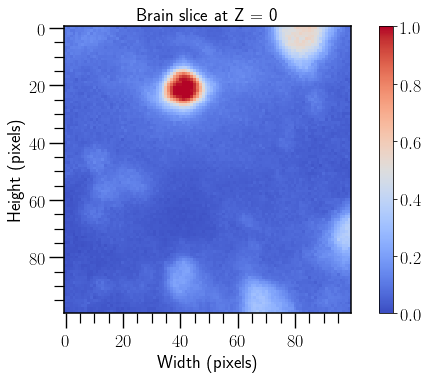

In [6]:
img_spot = vol[0:100, 1000:1100, 750:850]
img_spot_YX = img_spot[0, :, :]
img_spot_YX = np.squeeze(img_spot_YX)
plot_slices(img_spot_YX)

In [7]:
GROUND_TRUTH = PATH + "/inputs/locations_half.tif"
PARENT = PATH + "/tif_images/pred_notiled_max_0-100_1050-1150_800-900.tif"
CHILD = PATH + "/tif_images/pred_tiled_max_over_0_0-100_1050-1150_800-900.tif"
CHILD_OVER = PATH + "/tif_images/pred_tiled_max_over_25_0-100_1050-1150_800-900.tif"

## Inferencing: our Tile-based Strategy

In [8]:
# Load image as Numpy array
labels = io.imread(GROUND_TRUTH)
parent = io.imread(PARENT)
child = io.imread(CHILD)
child_over = io.imread(CHILD_OVER)

In [9]:
# Transform it in float
labels_float= labels.astype('float32')
parent_float= parent.astype('float32')
child_float= child.astype('float32')
child_over_float= child_over.astype('float32')

In [10]:
pixels_one = np.argwhere(labels_float == 1.0)
print("In the Ground Truths there are {} non-zero pixels".format(len(pixels_one)))
# Region selected to make inference 
region = labels_float[0:100, 1050:1150, 800:900]
centroids_px = np.argwhere(region == 1.0)
centroids_px # in pixels
(zo, yo, xo) = (0, 1050, 800) # lower-left corner

In the Ground Truths there are 13378 non-zero pixels


In [11]:
# in absolute coordinates
centroids = [centroids_px[i] + (zo, yo, xo) for i in range(len(centroids_px))]
centroids

[array([   0, 1081,  873]),
 array([   4, 1072,  849]),
 array([   6, 1102,  820]),
 array([  38, 1104,  808]),
 array([  44, 1070,  827]),
 array([  44, 1122,  810]),
 array([  48, 1108,  885]),
 array([  60, 1105,  807]),
 array([  80, 1149,  876])]

In [12]:
# Make a "sphere". We are considering spheroids of radius 5 each
z, y, x = np.ogrid[0:100,1050:1150,800:900]
mask0 = (z-centroids[0][0])**2 + (y-centroids[0][1])**2 + (x-centroids[0][2])**2 <= 5**2
mask1 = (z-centroids[1][0])**2 + (y-centroids[1][1])**2 + (x-centroids[1][2])**2 <= 5**2
mask2 = (z-centroids[2][0])**2 + (y-centroids[2][1])**2 + (x-centroids[2][2])**2 <= 5**2
mask3 = (z-centroids[3][0])**2 + (y-centroids[3][1])**2 + (x-centroids[3][2])**2 <= 5**2
mask4 = (z-centroids[4][0])**2 + (y-centroids[4][1])**2 + (x-centroids[4][2])**2 <= 5**2
mask5 = (z-centroids[5][0])**2 + (y-centroids[5][1])**2 + (x-centroids[5][2])**2 <= 5**2
mask6 = (z-centroids[6][0])**2 + (y-centroids[6][1])**2 + (x-centroids[6][2])**2 <= 5**2
mask7 = (z-centroids[7][0])**2 + (y-centroids[7][1])**2 + (x-centroids[7][2])**2 <= 5**2
mask8 = (z-centroids[8][0])**2 + (y-centroids[8][1])**2 + (x-centroids[8][2])**2 <= 5**2
# Mask the ground truth pixels
blobs = np.zeros((100,100,100))
blobs[mask0] = 1.0
blobs[mask1] = 1.0
blobs[mask2] = 1.0
blobs[mask3] = 1.0
blobs[mask4] = 1.0
blobs[mask5] = 1.0
blobs[mask6] = 1.0

<img src="./img/ground_truths.png" width="80%" align="middle">

<img src="./img/parent.png" width="80%" align="middle">

<img src="./img/child.png" width="80%" align="middle">

<img src="./img/child_overlap.png" width="80%" align="middle">

## Tile-based strategy goes parallel on MPCDF's clusters

<img src="./img/input_volume.png" width="30%" align="left">
<img src="./img/arrow.png" width="50%" align="middle">
<!--
<img src="./img/man.jpg" width="20%" align="left middle">
<img src="./img/job_slurm.png" width="30%" align="bottom">
-->
<img src="./img/Cobra-Rows.jpg" width="40%" align="right"> 

<!--**QUI METTERE SLURM JOB SCRIPT, SPIEGARE LA 'SUDDIVISIONE' GEOMETRICA, E ALCUNE FUNZIONALITA' DI SLURM JOB ARRAY**
-->

## 3D Tiling workflow on a typical MPCDF's HPC system

<img src="./img/Workflow.png" width="80%" align="middle">

## Expanding Serial Analysis with SLURM Array
- Solution:
    - If the job’s and their data are independent then we can
    - Submit a bunch of	similar serial jobs	each with their own job script
- Slurm **job arrays** can	help!
    - Create many jobs from	one	job	script!	Even 100’s of thousands!

- Job arrays offer a mechanism for submitting and managing collections of similar jobs quickly and easily.  Typically: 

<img src="./img/job_slurm.png" width="50%" align="right">

## How it works

<video src="./img/movie.m4v" controls>
<!--
<img src="./img/transition/transition.001.jpeg" width=80% align="middle">
-->

## Best practice


```bash
gdib@cobra01:~> cat test_job_array.sh
#!/bin/bash

#MAXarrayID=$SLURM_ARRAY_TASK_MAX 
# In a SLURM job-array script, will be set to the highest job array index
OVERLAP=50
ZMAX=768
YMAX=256
XMAX=512
ZMAXIMAGE=2304 # e.g 2048 number of stack of 2D images
YMAXIMAGE=1280 # e.g 1024 height of the image
XMAXIMAGE=1024 # e.g 1024 depth of the image

# The idea is to do 3D -> 1D mapping. For example, for a 3D matrix with dimensions "width",
# "height" and "depth", e.g.:
# id = x + (width*y) + (width*height*z);
# and reverse:
# x = id % width;
# y = (id / width)%height
# z = id / (width*height);
# Think about ZMAXIMAGE/ZMAX (and the same in the other directions) as the number of tiles in a row

MAXarrayID=$(( $ZMAXIMAGE / $ZMAX * $YMAXIMAGE / $YMAX * $XMAXIMAGE / $XMAX ))
# in a SLURM job array the for-loop is given "for free"
# arrayID is a SLURM ENV variable

for (( arrayID=0; arrayID < $MAXarrayID; arrayID++ ))
do

    x=$(( $arrayID % ($XMAXIMAGE / $XMAX) ))
    y=$((($arrayID / ($XMAXIMAGE / $XMAX)) % ($YMAXIMAGE / $YMAX) ))
    z=$(( $arrayID / ( ($XMAXIMAGE / $XMAX)*($YMAXIMAGE / $YMAX) ) ))
    
    ZSTART=$(( $z * $ZMAX - $OVERLAP ))
    ZEND=$(( ($z + 1) * $ZMAX + $OVERLAP ))
    YSTART=$(( $y * $YMAX -$OVERLAP ))
    YEND=$(( ($y + 1) * $YMAX + $OVERLAP ))
    XSTART=$(( $x * $XMAX -$OVERLAP ))
    XEND=$(( ($x + 1) * $XMAX + $OVERLAP ))

    if [[ $ZSTART -lt 0 ]]; then
        ZSTART=0
    fi
    if [[ $ZEND -gt $ZMAXIMAGE ]]; then
        ZEND=$ZMAXIMAGE
    fi
    if [[ $YSTART -lt 0 ]]; then
        YSTART=0
    fi
    if [[ $YEND -gt $YMAXIMAGE ]]; then
        YEND=$YMAXIMAGE
    fi
    if [[ $XSTART -lt 0 ]]; then
        XSTART=0
    fi
    if [[ $XEND -gt $XMAXIMAGE ]]; then
        XEND=$XMAXIMAGE
    fi

    tmpID=$(( $x + ($XMAXIMAGE / $XMAX)*$y + ($XMAXIMAGE / $XMAX) * ($YMAXIMAGE / $YMAX) *$z ))
    echo "Id: $arrayID; MaxID: $MAXarrayID; ComputedID: $tmpID; zyx: $z $y $x; Z: $ZSTART $ZEND; Y: $YSTART $YEND; X: $XSTART $XEND"

done
```

```bash 
$ ./test_job_array.sh
Id: 0; MaxID: 30; ComputedID: 0; zyx: 0 0 0; Z: 0 818; Y: 0 306; X: 0 562
Id: 1; MaxID: 30; ComputedID: 1; zyx: 0 0 1; Z: 0 818; Y: 0 306; X: 462 1024
Id: 2; MaxID: 30; ComputedID: 2; zyx: 0 1 0; Z: 0 818; Y: 206 562; X: 0 562
Id: 3; MaxID: 30; ComputedID: 3; zyx: 0 1 1; Z: 0 818; Y: 206 562; X: 462 1024
Id: 4; MaxID: 30; ComputedID: 4; zyx: 0 2 0; Z: 0 818; Y: 462 818; X: 0 562
Id: 5; MaxID: 30; ComputedID: 5; zyx: 0 2 1; Z: 0 818; Y: 462 818; X: 462 1024
Id: 6; MaxID: 30; ComputedID: 6; zyx: 0 3 0; Z: 0 818; Y: 718 1074; X: 0 562
Id: 7; MaxID: 30; ComputedID: 7; zyx: 0 3 1; Z: 0 818; Y: 718 1074; X: 462 1024
Id: 8; MaxID: 30; ComputedID: 8; zyx: 0 4 0; Z: 0 818; Y: 974 1280; X: 0 562
Id: 9; MaxID: 30; ComputedID: 9; zyx: 0 4 1; Z: 0 818; Y: 974 1280; X: 462 1024
Id: 10; MaxID: 30; ComputedID: 10; zyx: 1 0 0; Z: 718 1586; Y: 0 306; X: 0 562
Id: 11; MaxID: 30; ComputedID: 11; zyx: 1 0 1; Z: 718 1586; Y: 0 306; X: 462 1024
Id: 12; MaxID: 30; ComputedID: 12; zyx: 1 1 0; Z: 718 1586; Y: 206 562; X: 0 562
Id: 13; MaxID: 30; ComputedID: 13; zyx: 1 1 1; Z: 718 1586; Y: 206 562; X: 462 1024
Id: 14; MaxID: 30; ComputedID: 14; zyx: 1 2 0; Z: 718 1586; Y: 462 818; X: 0 562
Id: 15; MaxID: 30; ComputedID: 15; zyx: 1 2 1; Z: 718 1586; Y: 462 818; X: 462 1024
Id: 16; MaxID: 30; ComputedID: 16; zyx: 1 3 0; Z: 718 1586; Y: 718 1074; X: 0 562
Id: 17; MaxID: 30; ComputedID: 17; zyx: 1 3 1; Z: 718 1586; Y: 718 1074; X: 462 1024
Id: 18; MaxID: 30; ComputedID: 18; zyx: 1 4 0; Z: 718 1586; Y: 974 1280; X: 0 562
Id: 19; MaxID: 30; ComputedID: 19; zyx: 1 4 1; Z: 718 1586; Y: 974 1280; X: 462 1024
Id: 20; MaxID: 30; ComputedID: 20; zyx: 2 0 0; Z: 1486 2304; Y: 0 306; X: 0 562
Id: 21; MaxID: 30; ComputedID: 21; zyx: 2 0 1; Z: 1486 2304; Y: 0 306; X: 462 1024
Id: 22; MaxID: 30; ComputedID: 22; zyx: 2 1 0; Z: 1486 2304; Y: 206 562; X: 0 562
Id: 23; MaxID: 30; ComputedID: 23; zyx: 2 1 1; Z: 1486 2304; Y: 206 562; X: 462 1024
Id: 24; MaxID: 30; ComputedID: 24; zyx: 2 2 0; Z: 1486 2304; Y: 462 818; X: 0 562
Id: 25; MaxID: 30; ComputedID: 25; zyx: 2 2 1; Z: 1486 2304; Y: 462 818; X: 462 1024
Id: 26; MaxID: 30; ComputedID: 26; zyx: 2 3 0; Z: 1486 2304; Y: 718 1074; X: 0 562
Id: 27; MaxID: 30; ComputedID: 27; zyx: 2 3 1; Z: 1486 2304; Y: 718 1074; X: 462 1024
Id: 28; MaxID: 30; ComputedID: 28; zyx: 2 4 0; Z: 1486 2304; Y: 974 1280; X: 0 562
Id: 29; MaxID: 30; ComputedID: 29; zyx: 2 4 1; Z: 1486 2304; Y: 974 1280; X: 462 1024
```

## Recipe for running Inference on MPCDF HPC's system


```bash
#!/bin/bash -l
# Standard output and error:
#SBATCH -o ./array_Job.%A.%a.out
#SBATCH -e ./array_Job.%A.%a.err
# Initial working directory:
#SBATCH -D ./
# Job Name:
#SBATCH -J job_array      # Job name
# Queue:
#
#SBATCH --partition=medium
# Number of nodes and MPI tasks per node:
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
# Enable Hyperthreading:
#SBATCH --ntasks-per-core=2
# for OpenMP:
#SBATCH --cpus-per-task=20

#SBATCH --mail-type=all
#SBATCH --mail-user=gdib@mpcdf.mpg.de
# Job array
#SBATCH --array=0-29
# wall clock limit
#SBATCH --time=08:00:00
# Load modules
module load gcc/8
module load impi/2018.2 # Intel MPI Library
module load anaconda/3/5.1
module load tensorflow/cpu/1.12.0
pwd; hostname; date

arrayID=$SLURM_ARRAY_TASK_ID     # will be set to the job array index value (note, it's a string)
MAXarrayID=$SLURM_ARRAY_TASK_MAX # will be set to the highest job array index
# MAXarrayID=$(( $ZMAXIMAGE / $ZMAX * $YMAXIMAGE / $YMAX * $XMAXIMAGE / $XMAX )) this is the number - in theory to be computed previously

OVERLAP=50
ZMAX=768
YMAX=256
XMAX=512
ZMAXIMAGE=2304 # e.g 2048 number of stack of 2D images
YMAXIMAGE=1280 # e.g 1024 height of the image
XMAXIMAGE=1024 # e.g 1024 depth of the image

x=$(( $arrayID % ($XMAXIMAGE / $XMAX) ))
y=$((($arrayID / ($XMAXIMAGE / $XMAX)) % ($YMAXIMAGE / $YMAX) ))
z=$(( $arrayID / ( ($XMAXIMAGE / $XMAX)*($YMAXIMAGE / $YMAX) ) ))

ZSTART=$(( $z * $ZMAX - $OVERLAP ))
ZEND=$(( ($z + 1) * $ZMAX + $OVERLAP ))
YSTART=$(( $y * $YMAX -$OVERLAP ))
YEND=$(( ($y + 1) * $YMAX + $OVERLAP ))
XSTART=$(( $x * $XMAX -$OVERLAP ))
XEND=$(( ($x + 1) * $XMAX + $OVERLAP ))

if [[ $ZSTART -lt 0 ]]; then
     ZSTART=0
fi
if [[ $ZEND -gt $ZMAXIMAGE ]]; then
     ZEND=$ZMAXIMAGE
fi
if [[ $YSTART -lt 0 ]]; then
     YSTART=0
fi
if [[ $YEND -gt $YMAXIMAGE ]]; then
     YEND=$YMAXIMAGE
fi
if [[ $XSTART -lt 0 ]]; then
     XSTART=0
fi
if [[ $XEND -gt $XMAXIMAGE ]]; then
    XEND=$XMAXIMAGE
fi

# Print coordinates
echo "This is the task $arrayID, which will do runs $ZSTART to $ZEND in Z"
echo "... $YSTART to $YEND in Y"
echo "... and $XSTART to $XEND in X"
echo "While the highest job array index is $MAXarrayID"
tmpID=$(( $x + ($XMAXIMAGE / $XMAX)*$y + ($XMAXIMAGE / $XMAX) * ($YMAXIMAGE / $YMAX) *$z ))
echo "Id: $arrayID; MaxID: $MAXarrayID; ComputedID: $tmpID; zyx: $z $y $x; Z: $ZSTART $ZEND; Y: $    YSTART $YEND; X: $XSTART $XEND"
srun python leipzig_parallel.py --id $arrayID --tiles --stiching="max" --overlap $OVERLAP --window 100 --z_a $ZSTART --z_b $ZEND --y_a $YSTART --y_b $YEND --x_a $XSTART --x_b $XEND
echo "job finished"
```
<img src="./img/slurm_fun.png" width="50%" align="right">

### Modify the Initial Code ...

```python
def predictImageWithTiles(model, image,
        tile_size=(50,50,50),
        overlap=25, # 50% of overlap
        offset = 0,
        stiching = "max"):
    """This is a help function to calculate predictions on the initial image pixel-by-pixel.
    At each step, predictions are computed in corrispondence of the volume occupied by the tile (dim, dim, dim).
    Then the overlap region between two neighbouring tiles is updated with the maximum prediction value.
    """
    depth_limit = image.shape[0]
    height_limit = image.shape[1]
    width_limit = image.shape[2]
    zdim, ydim, xdim = tile_size # dimensions of each tile or sub-cube
    prediction = np.zeros((depth_limit, height_limit, width_limit, 1), dtype='float32') # output tensor with the same shape as the input image
    print("The image to be predicted has shape: {}".format(prediction.shape))
    # create input, label patches 
    rects = [] # input data region
    o_patches = []
    for z in range(0, depth_limit, zdim - overlap): # step = zdim - overlap
        for y in range(0, height_limit, ydim - overlap): # step = ydim - overlap
            for x in range(0, width_limit, xdim - overlap): # step = xdim - overlap
                if (z + zdim > depth_limit) or (y + ydim > height_limit) or (x + xdim > width_limit):
                    break
                rects.append((z - offset, y - offset, x - offset,
                    z - offset + zdim, y - offset +  ydim, x - offset + xdim))
                o_patch = image[z:z+zdim, y:y+ydim, x:x+xdim]
                o_patches.append(o_patch)
                prediction_tile = model.predict(np.expand_dims(o_patch, axis=0), verbose =1,batch_size=1)[0] # considering the "0th" batch element
                if stiching == "max":
                    prediction[z:z+zdim, y:y+ydim, x:x+xdim] = np.maximum(prediction[z:z+zdim, y:y+ydim, x:x+xdim], prediction_tile)

    n_patches = len(o_patches)
    print("The selected image has  been divided into {} overlapping tiles".format(n_patches))
    return prediction
```

```python
if __name__ ==  '__main__':
    parser = argparse.ArgumentParser(description='This is an embarassingly parallel job')
    parser.add_argument('-t', '--tiles', action='store_true', dest='TILES',
            help='Do you want to tile your image or not?')
    parser.add_argument('-s', '--sticthing', action='store_true', dest='STICHING',
            help='What kind of stiching method do you want?')
    parser.add_argument('-o', '--overlap', dest='OVERLAP', type=float, default=25,
            help='Tile overlap')
    parser.add_argument('-w','--window_size', dest='TILE', type=float,default=50,
            help='Tile size')
    parser.add_argument('-z_a', dest='Z_A', type=float, default=0,
            help='start in Z')
    parser.add_argument('-z_b', dest='Z_B', type=float, default=100,
            help='end in z')
    parser.add_argument('-y_a', dest='Y_A', type=float, default=1050,
            help='start in y')
    parser.add_argument('-y_b', dest='Y_B', type=float, default=1150,
            help='end in y')
    parser.add_argument('-x_a', dest='X_A', type=float, default=800,
            help='start in x')
    parser.add_argument('-x_b', dest='X_B', type=float, default=900,
            help='end in x')
    args = parser.parse_args()

    print(args)
    image = IMAGE[args.z_a:args.z_b, args.y_a:args.y_b, args.x_a:args.x_b]

    if args.tiles:
        print("We are making inference with overlap-tiling strategy")
        predictions = predictImageWithTiles(model,
            image = image,
            tile_size = (TILE, TILE, TILE),
            overlap = OVERLAP,
            stiching = STICHING)
    else:
        print("We are making inference without overlap-tiling strategy")
        predictions = predictImageAsItIs(model,
            image = image)
```

## 3D Reconstruction


In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import os
import re
import glob
import argparse
import warnings
import numpy as np
import matplotlib.cm as cm
warnings.filterwarnings('ignore')
from matplotlib import rc, rcParams
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import cv2 as cv
from skimage import io
ZMAX=768 # is the dimension of each tile along z 
YMAX=256 # is the dimension of each tile along y
XMAX=512 # is the dimension of each tile along x
OVERLAP=50
ZMAXIMAGE=2304 # dimension of the original image along z 
YMAXIMAGE=1280 # dimension of the original image along y
XMAXIMAGE=1024 # dimension of the original image along x

# Let's properly order the results of job arrays
dir = "./inference/" #working  directory
ext = ".tif" # whatever extension you want
pathname = os.path.join(dir, "*" + ext)
# First get files
files =glob.glob(pathname)
# files = [file for file in sorted(glob.glob(pathname))] # sorted by filename
# if you want sort files according to the digits included in the filename, you can do as following:
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['./inference/tile_0.tif',
 './inference/tile_1.tif',
 './inference/tile_2.tif',
 './inference/tile_3.tif',
 './inference/tile_4.tif',
 './inference/tile_5.tif',
 './inference/tile_6.tif',
 './inference/tile_7.tif',
 './inference/tile_8.tif',
 './inference/tile_9.tif',
 './inference/tile_10.tif',
 './inference/tile_11.tif',
 './inference/tile_12.tif',
 './inference/tile_13.tif',
 './inference/tile_14.tif',
 './inference/tile_15.tif',
 './inference/tile_16.tif',
 './inference/tile_17.tif',
 './inference/tile_18.tif',
 './inference/tile_19.tif',
 './inference/tile_20.tif',
 './inference/tile_21.tif',
 './inference/tile_22.tif',
 './inference/tile_23.tif',
 './inference/tile_24.tif',
 './inference/tile_25.tif',
 './inference/tile_26.tif',
 './inference/tile_27.tif',
 './inference/tile_28.tif',
 './inference/tile_29.tif']

# Let's "glue" the tiles all togheter
```python
def threeDreconstruct(files):

    result = np.zeros((ZMAXIMAGE, YMAXIMAGE, XMAXIMAGE), dtype='float32') # the output volume
    for index, file in enumerate(files):
        image = io.imread(file)
        image = np.squeeze(image) # the TF output is a tensor (d,h,w,c)
        image = image.astype('float32')/(255) 

        x = index % (XMAXIMAGE // XMAX)
        y = index // (XMAXIMAGE // XMAX) % (YMAXIMAGE // YMAX)
        z = index // ((XMAXIMAGE // XMAX) * (YMAXIMAGE // YMAX))

        ZSTART = z * ZMAX - OVERLAP
        ZEND = (z + 1) * ZMAX + OVERLAP
        YSTART = y * YMAX - OVERLAP
        YEND = (y + 1) * YMAX + OVERLAP
        XSTART = x * XMAX - OVERLAP
        XEND = (x + 1) * XMAX + OVERLAP
        if ZSTART < 0:
            ZSTART = 0
        if ZEND > ZMAXIMAGE:
            ZEND = ZMAXIMAGE
        if YSTART < 0:
            YSTART = 0
        if YEND > YMAXIMAGE:
            YEND = YMAXIMAGE
        if XSTART < 0:
            XSTART = 0
        if XEND > XMAXIMAGE:
            XEND = XMAXIMAGE

        print("Processing Image: {}".format(file))
        print("index {}".format(index), "z y x {}{}{}".format(z, y, x))
        print("ZSTART {} ZEND {} YSTART {} YEND {} XSTART {} XEND {}".format(ZSTART, ZEND, YSTART, YEND, XSTART, XEND))    
        result[ZSTART:ZEND, YSTART:YEND, XSTART:XEND] = np.maximum(result[ZSTART:ZEND, YSTART:YEND, XSTART:XEND],image)
    result = (result*255).astype('uint8')
    print("final array with shape {}".format(result.shape))
    print("final array is a {}".format(type(result)))
    print("with data type {}".format(result.dtype))
    return io.imsave("tiling_skylake.tif", result)

if __name__ == '__main__':
    threeDreconstruct(files)
```

## Results
***30 SLURM Job Arrays, on 15 Computing Nodes***

- 2 NVIDIA-V100-Tensor-Core GPUs, 32 GB  (a job x each GPU): ~ 480 sec.
-  80 CPUs (hyperthreading enabled) Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz: ~ 5000 sec.

<img src="./img/NVIDIA-V100-Tensor-Core-Math.jpg" width="50%" align="left">
<img src="./img/intelXeon.jpg" width="25%" align="right">


NVIDIA® Tesla® V100 Tensor Core is the most advanced data center GPU ever built to accelerate AI, high performance computing (HPC), data science and graphics. It’s powered by NVIDIA Volta architecture, comes in 16 and 32GB configurations, and offers the performance of up to 100 CPUs in a single GPU. Data scientists, researchers, and engineers can now spend less time optimizing memory usage and more time designing the next AI breakthrough.

## OpenVINO 3D MRI Brain Tissue Segmentation

OpenVINO™ Out Of the Box + Custom Solution:

- OOB Activation memory reuse during execution
<!--- Custom 3D convolution primitive for dilation and 1 output-->
- Custom automatic topology transformation during import to reduce data dependency

RESULTS:
- Inference can be executed on a **single XEON node**
- OpenVINO™ memory reuse reduces **memory requirement to 1.2 TB**
- Inference time for whole model using OpenVINO™: **41 minutes**

(Aknowledgments: D. Gorokhov, Yury Gorbachev, V. Kostarev from Intel for sharing material)
<img src="./img/intelAI.jpg" width="10%" align="left">

## Evaluation
<!--
<img src="./img/image_190.png" width="50%" align="top">
<img src="./img/inference_190.png" width="50%" align="bottom">
<img src="./img/locations_conv3D.png" width="50%" align="right">
<img src="./img/openvino_190.png" width="50%" align="left">
-->
<img src="./img/evaluation.png" width="90%" align="top">


## Ongoing & Future Work

- Tuning parameters (e.g. tile size; overlap)
- Improving the stiching strategy
- Growing the Training Set and Improving Predictions Quality
    - accuracy of the AI predicted centroid segments can be further improved 
- Deep Image Prior
    - Speed up and Parallelizzation strategy

## Coming soon

<img src="./img/TF_Replicator.png" width="90%" align="top">

## Thank you!

Questions: giuseppe.di-bernardo@mpcdf.mpg.de

## Backup Slides

### Optimizig Scikit-Learn with Intel DAAL 

<img src="./img/daal_intel.png" width="90%" align="top">